<a href="https://colab.research.google.com/github/zhengwu123/Machine_learning_group_project/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
import cv2
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np


In [0]:
!unzip Archive.zip


Archive:  Archive.zip
   creating: real_tongue/
  inflating: real_tongue/RackMultipart20200503-26620-1akr951.jpg  
   creating: __MACOSX/
   creating: __MACOSX/real_tongue/
  inflating: __MACOSX/real_tongue/._RackMultipart20200503-26620-1akr951.jpg  
  inflating: real_tongue/RackMultipart20200416-10895-9smho0.jpg  
  inflating: __MACOSX/real_tongue/._RackMultipart20200416-10895-9smho0.jpg  
  inflating: real_tongue/RackMultipart20200503-13017-1bdk7p6.jpg  
  inflating: __MACOSX/real_tongue/._RackMultipart20200503-13017-1bdk7p6.jpg  
  inflating: real_tongue/RackMultipart20200503-18464-cpyarc.jpg  
  inflating: __MACOSX/real_tongue/._RackMultipart20200503-18464-cpyarc.jpg  
  inflating: real_tongue/RackMultipart20200416-3289-1b3bwib.jpg  
  inflating: __MACOSX/real_tongue/._RackMultipart20200416-3289-1b3bwib.jpg  
  inflating: real_tongue/IMG_3039(20200416-021835).JPG  
  inflating: __MACOSX/real_tongue/._IMG_3039(20200416-021835).JPG  
  inflating: real_tongue/RackMultipart20200503-130

In [0]:
#rename all my files
import glob, os

def rename(dir, pattern, titlePattern):
    for pathAndFilename in glob.iglob(os.path.join(dir, pattern)):
        title, ext = os.path.splitext(os.path.basename(pathAndFilename))
        os.rename(pathAndFilename, 
                  os.path.join(dir, titlePattern % title + ext))
#rename all files
rename('real_main', '*.JPG', '%s'+ " main")
#rename('fake_main', '*.JPG', '%s'+ " main")
rename('real_di', '*.jpg', '%s'+ " di")
#rename('fake_di', '*.jpg', '%s'+ " fake")
rename('real_lid', '*.jpg', '%s'+ " lid")
rename('real_side', '*.jpg', '%s'+ " side")
rename('real_console', '*.jpg', '%s'+ " console")
rename('real_nei', '*.jpg', '%s'+ " nei")
rename('real_tongue', '*.jpg', '%s'+ " tongue")

In [0]:
# prepare data
import random
train_real_main = ['real_main/{}'.format(i) for i in os.listdir("real_main") if 'main' in i]
train_real_di = ['real_di/{}'.format(i) for i in os.listdir("real_di") if 'di' in i]
train_real_lid = ['real_lid/{}'.format(i) for i in os.listdir("real_lid") if 'lid' in i]
train_real_side = ['real_side/{}'.format(i) for i in os.listdir("real_side") if 'side' in i]
train_real_nei = ['real_nei/{}'.format(i) for i in os.listdir("real_nei") if 'nei' in i]
train_real_console = ['real_console/{}'.format(i) for i in os.listdir("real_console") if 'console' in i]
train_real_tongue = ['real_tongue/{}'.format(i) for i in os.listdir("real_tongue") if 'tongue' in i]
train_images = train_real_main + train_real_di + train_real_lid + train_real_side + train_real_nei+train_real_console+train_real_tongue
random.shuffle(train_images)

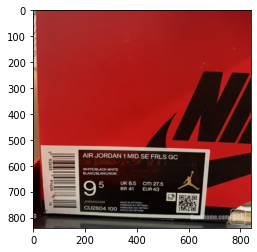

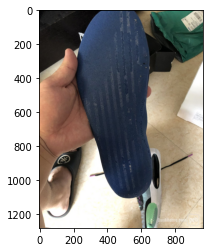

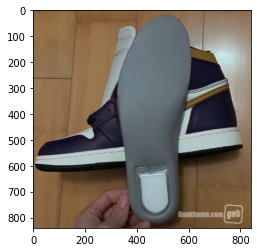

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for ima in train_images[0:3]:
  img=mpimg.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [0]:
nrows = 150
ncolumns = 150
channels = 3  #change to 1 if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'main' in image:
            y.append(0)
        elif 'di' in image:
            y.append(1)
        elif 'lid' in image:
            y.append(2)
        elif 'side' in image:
            y.append(3)
        elif 'nei' in image:
            y.append(4)
        elif 'console' in image:
            y.append(5)
        elif 'tongue' in image:
            y.append(6)
    
    return X, y

In [0]:
# put traing image into x , y
X, y = read_and_process_image(train_images)
X = np.array(X)
y = np.array(y)

In [46]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (724, 150, 150, 3)
Shape of labels is: (724,)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Conv3D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import optimizers


In [51]:
model = Sequential()

#add conv1
model.add(Conv2D(32,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(150,150,3)))
#add pool1
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model.add(Conv2D(64, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#x_train = np.array(real_image_array)
#x_test = np.array(fake_images_array)
#y_train = np.array(fake_images_array)
#y_test = np.array(y_test)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
r = model.fit(x_train,y_train,batch_size=100,epochs=100)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Epoch 1/100
6/6 [==============================] - 0s 16ms/step - loss: 170.4412 - accuracy: 0.1537
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 34.6000 - accuracy: 0.2297
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 2.9082 - accuracy: 0.3316
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 1.6399 - accuracy: 0.3851
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 1.3633 - accuracy: 0.5043
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 1.1661 - accuracy: 0.6028
Epoch 7/100
6/6 [==============================] - 0s 16ms/step - loss: 1.0094 - accuracy: 0.6805
Epoch 8/100
6/6 [==============================] - 0s 15ms/step - loss: 0.8156 - accuracy: 0.7323
Epoch 9/100
6/6 [==============================] - 0s 15ms/step - loss: 0.6425 - accuracy: 0.7945
Epoch 10/100
6/6 [==============================] - 0s 16ms/step - loss: 0.4990 - accuracy: 0.8549
Epoch 11/100
6/6

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dense_7 (Dense)              (None, 7)                

[1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 0]


In [65]:
test_result = model.predict(x_test)
#print(y_result.shape)
#print(y_test.shape)
test_result_array = []

for i in range(len(test_result)):
  mark = 0
  for j in range(7):
    if test_result[i][j] > 0.5:
      test_result_array.append(j)
      mark = 1
      break
    if mark == 0 and j == 9:
      test_result_array.append(10)

    
count = 0
for i in range(len(y_test)):
  if test_result_array[i] == y_test[i]:
    count += 1
test_accuracy = count/(len(y_test))

print("test accuracy:", test_accuracy)

test accuracy: 0.5517241379310345
